In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

In [2]:
food_loss = pd.read_csv("../Resources/FAO_Food_Loss.csv")
food_country = pd.read_csv("../Resources/Food_Loss_By_Country.csv")
Africa_Country_List = ["Ethiopia", "Kenya", "Uganda", "Ghana", "Malawi",
                       "Senegal", "Zambia", "Burkina Faso", "Angola","Benin",
                       "Mali", "United Republic of Tanzania","Mozambique","Rwanda","Nigeria"]
Africa_Food_df = []

for i, row in food_loss.iterrows():
    if row["country"] in Africa_Country_List:
        Africa_Food_df.append(row)
Africa_Food_df = pd.DataFrame(Africa_Food_df)
Africa_Food_df.columns



Index(['m49_code', 'country', 'region', 'cpc_code', 'commodity', 'year',
       'loss_percentage', 'loss_percentage_original', 'loss_quantity',
       'activity1', 'activity2', 'food_supply_stage', 'treatment',
       'cause_of_loss', 'sample_size', 'method_data_collection', 'reference',
       'url', 'notes', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21',
       'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25',
       'Unnamed: 26', 'Unnamed: 27'],
      dtype='object')

In [3]:
Africa_Food_df = Africa_Food_df[["m49_code",'country','region','cpc_code','commodity','year',
                                'loss_percentage','loss_percentage_original','loss_quantity',
                                'activity1','activity2','food_supply_stage','treatment','cause_of_loss',
                                'sample_size','method_data_collection','reference','url','notes']]
Africa_Food_df.loc[Africa_Food_df["activity1"] == "Storage", "food_supply_stage"] = "Storage"
Africa_Food_df.loc[Africa_Food_df["activity1"] == "Transportation", "food_supply_stage"] = "Transportation"
Africa_Food_df.loc[Africa_Food_df["activity1"] == "Shelling", "food_supply_stage"] = "Harvest"
Africa_Food_df.loc[Africa_Food_df["food_supply_stage"] == "Transport", "food_supply_stage"] = "Transportation"
Africa_Food_df.loc[Africa_Food_df["activity1"] == "Drying", "food_supply_stage"] = "Farm"
Africa_Food_df.loc[Africa_Food_df["food_supply_stage"] == "Collector", "food_supply_stage"] = "Harvest"
Africa_Food_df

blank_rows = Africa_Food_df[Africa_Food_df['food_supply_stage'].isnull() | (Africa_Food_df['food_supply_stage'] == '') & (Africa_Food_df['activity1'].isnull())]
blank_rows

Africa_Food_df = Africa_Food_df.drop(blank_rows.index)
Africa_Food_df

Africa_Food_df

,m49_code,country,region,cpc_code,commodity,year,loss_percentage,loss_percentage_original,loss_quantity,activity1,activity2,food_supply_stage,treatment,cause_of_loss,sample_size,method_data_collection,reference,url,notes
2245,204,Benin,NaN,0113,Rice,2022,4.70,4.70%,NaN,Threshing,NaN,Farm,Manual threshing,NaN,NaN,Survey,"Amoussouhoui, Rico; Akpa, Kuassi Auxence Arist...",NaN,Reference has been generated automatically
2246,204,Benin,NaN,0113,Rice,2022,3.42,3.42%,NaN,Storage,NaN,Storage,Paddy and milled rice,NaN,NaN,Survey,"Amoussouhoui, Rico; Akpa, Kuassi Auxence Arist...",NaN,Reference has been generated automatically
2247,204,Benin,NaN,0113,Rice,2022,10.97,10.97%,NaN,Harvesting,NaN,Harvest,Manual harvesting,NaN,NaN,Survey,"Amoussouhoui, Rico; Akpa, Kuassi Auxence Arist...",NaN,Reference has been generated automatically
2248,204,Benin,NaN,0113,Rice,2022,2.80,2.80%,NaN,Harvesting,NaN,Harvest,Harvesting with manual per panicle,NaN,NaN,Survey,"Amoussouhoui, Rico; Akpa, Kuassi Auxence Arist...",NaN,Reference has been generated automatically
2249,204,Benin,NaN,0113,Rice,2022,1.09,1.09%,NaN,Winnowing,NaN,Farm,NaN,NaN,NaN,Survey,"Amoussouhoui, Rico; Akpa, Kuassi Auxence Arist...",NaN,Reference has been generated automatically
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27738,894,Zambia,"Chivuna, Chalimbana,",0112,Maize (corn),1977,13.00,13,NaN,NaN,NaN,Storage,NaN,Insects,20,Case Study,Adams & Harman,http://gala.gre.ac.uk/10767/,NaN
27739,894,Zambia,NaN,0112,Maize (corn),1977,15.00,9.0-21,NaN,NaN,NaN,Storage,NaN,NaN,NaN,Literature Review,"(Adams and Harman, 1977)",https://www.nap.edu/catalog/20028/postharvest-...,NaN
27740,894,Zambia,NaN,0114,Sorghum,1977,5.00,0-10,NaN,NaN,NaN,Whole supply chain,NaN,NaN,NaN,Literature Review,"(fPI, 1977)",https://www.nap.edu/catalog/20028/postharvest-...,NaN
27741,894,Zambia,NaN,0118,Millet,1977,10.00,10,NaN,NaN,NaN,Storage,NaN,On-Farm Storage,NaN,Literature Review,FAO 1977b,https://www.nap.edu/catalog/20028/postharvest-...,NaN


In [4]:
data_holder = [[]for i in Africa_Country_List]

for i, row in Africa_Food_df.iterrows():
    if row["country"] in Africa_Country_List:
        index = Africa_Country_List.index(row["country"])
        data_holder[index].append(row)


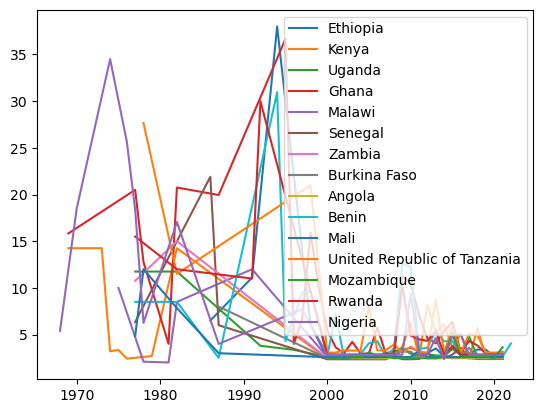

In [5]:
for i in range(len(data_holder)):
    data_test = pd.DataFrame(data_holder[i])
    grouped_data = data_test.groupby("year")
    this_year_mean = grouped_data["loss_percentage"].mean()
    plt.plot(this_year_mean.index, this_year_mean, label = f"{Africa_Country_List[i]}")
    plt.legend()

#This was testing data that we didn't use for the project, because multiple group members had already created some of the same data sets.

## 

In [6]:
GDP_Per_Country = pd.read_csv("GDP_data.csv")
GDP_Per_Country_2023 = GDP_Per_Country[["Country Name","Country Code","Indicator Name","Indicator Code","2023"]]
food_country = food_country.rename(columns={"Country":"Country Name"})
combined_2023 = pd.merge(food_country, GDP_Per_Country_2023, how='left', on='Country Name')
combined_2023.dropna(how='any', inplace=True)
combined_2023


,Country Name,combined figures (kg/capita/year),Household estimate (kg/capita/year),Household estimate (tonnes/year),Retail estimate (kg/capita/year),Retail estimate (tonnes/year),Food service estimate (kg/capita/year),Food service estimate (tonnes/year),Confidence in estimate,M49 code,Region,Source,Country Code,Indicator Name,Indicator Code,2023
1,Albania,127,83,238492,16,45058,28,79651,Very Low Confidence,8,Southern Europe,https://www.unep.org/resources/report/unep-foo...,ALB,GDP per capita (current US$),NY.GDP.PCAP.CD,8367.775731
2,Algeria,135,91,3918529,16,673360,28,1190335,Very Low Confidence,12,Northern Africa,https://www.unep.org/resources/report/unep-foo...,DZA,GDP per capita (current US$),NY.GDP.PCAP.CD,5260.206250
3,Andorra,123,84,6497,13,988,26,1971,Low Confidence,20,Southern Europe,https://www.unep.org/resources/report/unep-foo...,AND,GDP per capita (current US$),NY.GDP.PCAP.CD,46544.720720
4,Angola,144,100,3169523,16,497755,28,879908,Very Low Confidence,24,Sub-Saharan Africa,https://www.unep.org/resources/report/unep-foo...,AGO,GDP per capita (current US$),NY.GDP.PCAP.CD,2309.521620
5,Antigua and Barbuda,113,74,7178,13,1244,26,2483,Low Confidence,28,Latin America and the Caribbean,https://www.unep.org/resources/report/unep-foo...,ATG,GDP per capita (current US$),NY.GDP.PCAP.CD,21560.215330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,Uzbekistan,135,91,3001868,16,515841,28,911881,Very Low Confidence,860,Central Asia,https://www.unep.org/resources/report/unep-foo...,UZB,GDP per capita (current US$),NY.GDP.PCAP.CD,2496.107758
208,Vanuatu,135,91,27296,16,4691,28,8292,Very Low Confidence,548,Melanesia,https://www.unep.org/resources/report/unep-foo...,VUT,GDP per capita (current US$),NY.GDP.PCAP.CD,3367.094639
210,Viet Nam,120,76,7346717,16,1508689,28,2666991,Very Low Confidence,704,South-eastern Asia,https://www.unep.org/resources/report/unep-foo...,VNM,GDP per capita (current US$),NY.GDP.PCAP.CD,4346.768492
212,Zambia,122,78,1391729,16,279350,28,493822,Very Low Confidence,894,Sub-Saharan Africa,https://www.unep.org/resources/report/unep-foo...,ZMB,GDP per capita (current US$),NY.GDP.PCAP.CD,1369.129365


The correlation between both factors is -0.25


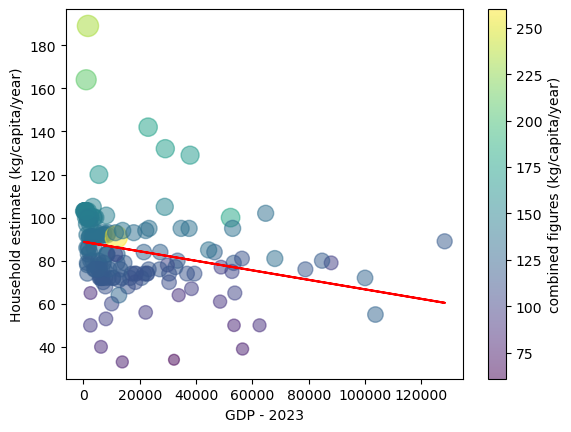

In [7]:
#This was an earlier build of a data set that we didn't use because it didn't have sufficient enough information

combined_2023.plot(kind="scatter", x='2023' , 
                   y='Household estimate (kg/capita/year)', 
                   s='combined figures (kg/capita/year)',
                   c='combined figures (kg/capita/year)',
                   cmap='viridis', alpha=0.5,
                   xlabel='GDP - 2023')

x_values = combined_2023['2023']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, combined_2023['Household estimate (kg/capita/year)'])
regress_values = x_values * slope + intercept
plt.plot(combined_2023['2023'],regress_values,"r-")

correlation = st.pearsonr(combined_2023['2023'],combined_2023['Household estimate (kg/capita/year)'])
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is -0.17


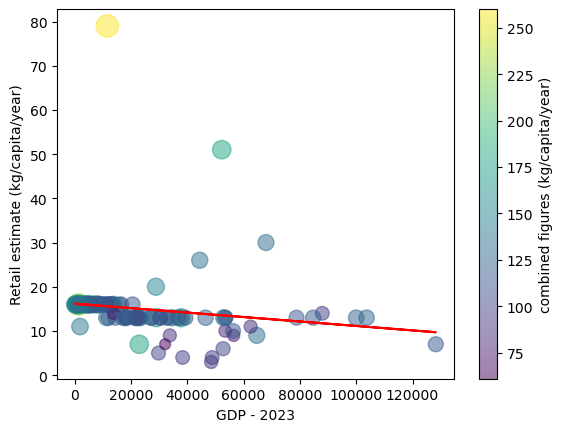

In [8]:
combined_2023.plot(kind="scatter", x='2023' , 
                   y='Retail estimate (kg/capita/year)', 
                   s='combined figures (kg/capita/year)',
                   c='combined figures (kg/capita/year)',
                   cmap='viridis', alpha=0.5,
                   xlabel='GDP - 2023')

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, combined_2023['Retail estimate (kg/capita/year)'])
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")

correlation = st.pearsonr(x_values,combined_2023['Retail estimate (kg/capita/year)'])
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is -0.11


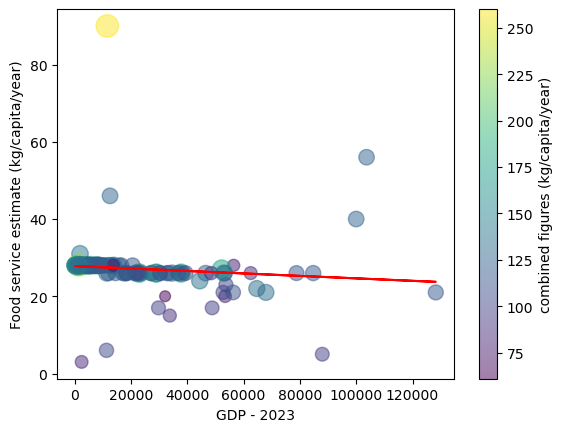

In [9]:
combined_2023.plot(kind="scatter", x='2023' , 
                   y='Food service estimate (kg/capita/year)', 
                   s='combined figures (kg/capita/year)',
                   c='combined figures (kg/capita/year)',
                   cmap='viridis', alpha=0.5,
                   xlabel='GDP - 2023')

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, combined_2023['Food service estimate (kg/capita/year)'])
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")

correlation = st.pearsonr(x_values,combined_2023['Food service estimate (kg/capita/year)'])
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is -0.29


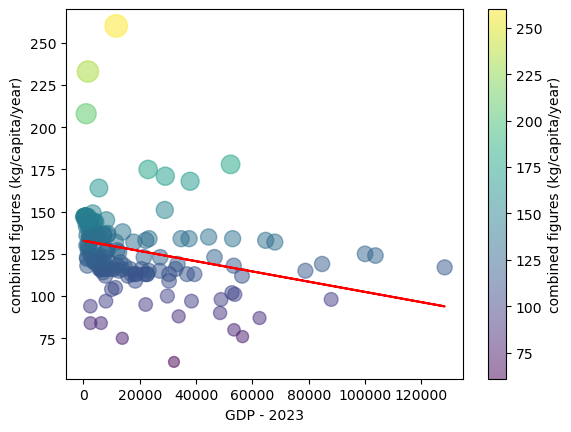

In [10]:
combined_2023.plot(kind="scatter", x='2023' , 
                   y='combined figures (kg/capita/year)', 
                   s='combined figures (kg/capita/year)',
                   c='combined figures (kg/capita/year)',
                   cmap='viridis', alpha=0.5,
                   xlabel='GDP - 2023')

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, combined_2023['combined figures (kg/capita/year)'])
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")

correlation = st.pearsonr(x_values,combined_2023['combined figures (kg/capita/year)'])
print(f"The correlation between both factors is {round(correlation[0],2)}")

In [11]:
#Parts of the project that Actually went through

GDP_Per_Country_list = GDP_Per_Country[["Country Name","Country Code","Indicator Name","Indicator Code",
                                        "2000","2001","2002","2003","2004","2005","2006","2007","2008",
                                        "2009","2010","2011","2012","2013","2014","2015","2016","2017",
                                        "2018","2019","2020","2021"]]
GDP_Per_Country_list = GDP_Per_Country_list.rename(columns={"Country Name":"country"})
GDP_Per_Country_list["Mean GDP"] = 0.0

for i, row in GDP_Per_Country_list.iterrows():
    count = 0
    total = 0
    for year in range(2000, 2021 + 1):  
        value = row[str(year)]
        if pd.notna(value):
            total += value
            count += 1
    if count > 0:
        GDP_Per_Country_list.at[i, "Mean GDP"] = total / count

GDP_Per_Country_list = GDP_Per_Country_list.dropna(how='any')
GDP_Per_Country_list.head()

,country,Country Code,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,2005,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Mean GDP
0,Aruba,ABW,GDP per capita (current US$),NY.GDP.PCAP.CD,21026.167090,20911.192770,21375.269120,22050.589870,24105.524120,24978.221670,...,26514.868980,26940.264110,28419.264530,28449.712950,29329.081750,30918.483580,31902.809820,24008.127820,29127.759380,26109.767851
1,Africa Eastern and Southern,AFE,GDP per capita (current US$),NY.GDP.PCAP.CD,715.142507,633.473382,633.520201,819.986705,994.193854,1130.168938,...,1696.356040,1678.553610,1498.805084,1346.301281,1485.753579,1558.612079,1508.486886,1356.088871,1545.956697,1325.711683
2,Afghanistan,AFG,GDP per capita (current US$),NY.GDP.PCAP.CD,180.188369,142.903364,182.174038,199.643226,221.830531,254.115276,...,638.733181,626.512929,566.881130,523.053012,526.140801,492.090631,497.741431,512.055098,355.777826,419.579603
3,Africa Western and Central,AFW,GDP per capita (current US$),NY.GDP.PCAP.CD,527.202562,539.225749,627.095915,706.476561,850.083582,1008.341766,...,2154.315084,2248.518426,1882.518808,1648.920269,1590.555785,1735.445833,1813.609146,1688.470871,1769.171853,1459.595372
4,Angola,AGO,GDP per capita (current US$),NY.GDP.PCAP.CD,556.884253,527.464110,872.657631,982.805587,1254.696119,1900.723809,...,5061.349253,5011.984427,3217.339240,1809.709377,2439.374439,2540.508879,2191.347764,1450.905111,1927.474078,2634.027205


In [12]:
food_loss = food_loss[["m49_code",'country','region','cpc_code','commodity','year',
                                'loss_percentage','loss_percentage_original','loss_quantity',
                                'activity1','activity2','food_supply_stage','treatment','cause_of_loss',
                                'sample_size','method_data_collection','reference','url','notes']]
food_loss.loc[food_loss["activity1"] == "Storage", "food_supply_stage"] = "Storage"
food_loss.loc[food_loss["activity1"] == "Transportation", "food_supply_stage"] = "Transportation"
food_loss.loc[food_loss["activity1"] == "Shelling", "food_supply_stage"] = "Harvest"
food_loss.loc[food_loss["food_supply_stage"] == "Transport", "food_supply_stage"] = "Transportation"
food_loss.loc[food_loss["activity1"] == "Drying", "food_supply_stage"] = "Farm"
food_loss.loc[food_loss["food_supply_stage"] == "Collector", "food_supply_stage"] = "Harvest"

blank_rows = food_loss[food_loss['food_supply_stage'].isnull() | (food_loss['food_supply_stage'] == '') & (food_loss['activity1'].isnull())]
blank_rows

food_loss = food_loss.drop(blank_rows.index)
food_loss = food_loss[(food_loss["year"] >= 2000) & (food_loss["year"] <= 2021)]
food_loss_grp = food_loss.groupby(['country', 'food_supply_stage'])

food_loss_mean = food_loss_grp["loss_percentage"].mean()
food_loss_mean = pd.DataFrame(food_loss_mean)
food_loss_mean = food_loss_mean.reset_index()


Farm = []
Harvest = []
Storage = []
Household = []

food_loss_mean.head(50)

food_loss_mean["food_supply_stage"].value_counts()

for index, row in food_loss_mean.iterrows():
    if row['food_supply_stage'] == 'Farm':
        Farm.append(row)
    elif row['food_supply_stage'] == 'Harvest':
        Harvest.append(row)    
    elif row['food_supply_stage'] == 'Storage':
        Storage.append(row)
    elif row['food_supply_stage'] == 'Household':
        Household.append(row)
Farm = pd.DataFrame(Farm)
Farm = pd.merge(Farm,GDP_Per_Country_list, how='left', on='country')
Farm = Farm.dropna(how = 'any')

Harvest = pd.DataFrame(Harvest)
Harvest = pd.merge(Harvest,GDP_Per_Country_list, how='left', on='country')
Harvest = Harvest.dropna(how = 'any')

Storage = pd.DataFrame(Storage)
Storage = pd.merge(Storage,GDP_Per_Country_list, how='left', on='country')
Storage = Storage.dropna(how = 'any')



In [13]:
food_loss_mean['food_supply_stage'].unique()

array(['Whole supply chain', 'Farm', 'Harvest', 'Storage',
       'Transportation', 'Households', 'Processing', 'Wholesale',
       'Market', 'Retail', 'Food Services', 'Post-harvest', 'Trader',
       'Export', 'Distribution', 'Pre-harvest', 'Stacking', 'Packing',
       'Grading'], dtype=object)

The correlation between both factors is 0.13


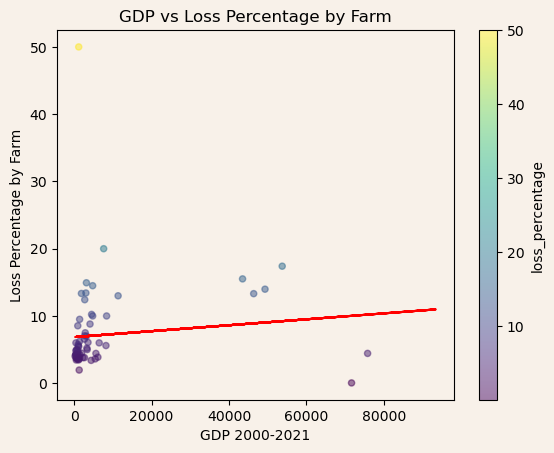

In [14]:
Farm.plot(kind="scatter", x='Mean GDP' , 
          y='loss_percentage',
          c='loss_percentage',
          cmap='viridis', alpha=0.5,
          xlabel='GDP 2000-2021',
          ylabel='Loss Percentage by Farm',
          title='GDP vs Loss Percentage by Farm')
x_values = Farm['2021'] 
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values,Farm["loss_percentage"] )
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")


plt.gca().set_facecolor('#F8F1E9')  
plt.gcf().set_facecolor('#F8F1E9')

correlation = st.pearsonr(x_values,Farm["loss_percentage"])
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.savefig('GDP vs Loss Percentage by Farm.png')

The correlation between both factors is 0.2


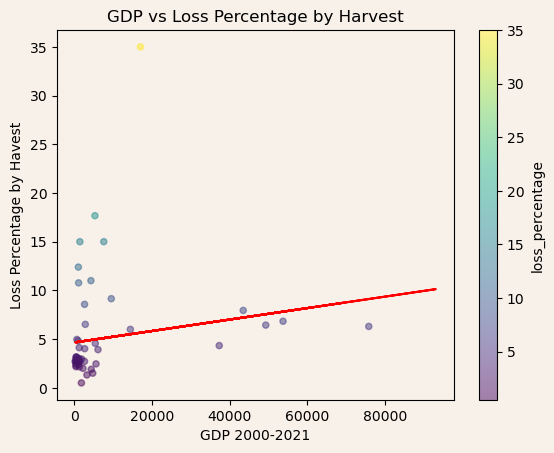

In [15]:
Harvest.plot(kind="scatter", x='Mean GDP' , 
          y='loss_percentage',
          c='loss_percentage',
          cmap='viridis', alpha=0.5,
          xlabel='GDP 2000-2021',          
          ylabel='Loss Percentage by Havest',
          title='GDP vs Loss Percentage by Harvest')
x_values = Harvest['2021'] 
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values,Harvest["loss_percentage"] )
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")

plt.gca().set_facecolor('#F8F1E9')  
plt.gcf().set_facecolor('#F8F1E9')

correlation = st.pearsonr(x_values,Harvest["loss_percentage"])
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.savefig('GDP vs Loss Percentage by Harvest.png')

The correlation between both factors is 0.17


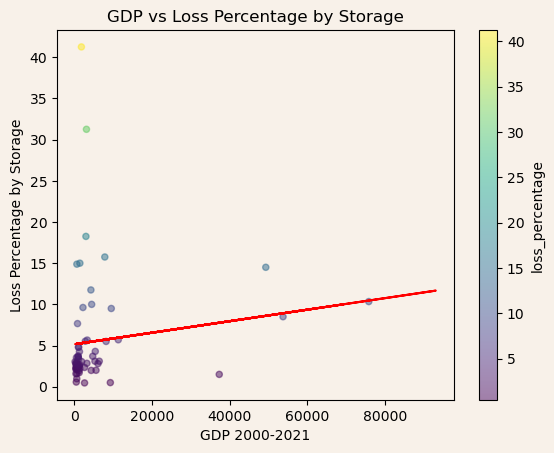

In [16]:
Storage.plot(kind="scatter", x='Mean GDP' , 
          y='loss_percentage',
          c='loss_percentage',
          cmap='viridis', alpha=0.5,
          xlabel='GDP 2000-2021',          
          ylabel='Loss Percentage by Storage',
          title='GDP vs Loss Percentage by Storage')
x_values = Storage['2021'] 
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values,Storage["loss_percentage"] )
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")

plt.gca().set_facecolor('#F8F1E9')  
plt.gcf().set_facecolor('#F8F1E9')

correlation = st.pearsonr(x_values,Storage["loss_percentage"])
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.savefig('GDP vs Loss Percentage by Storage.png')

The correlation between both factors is 0.24


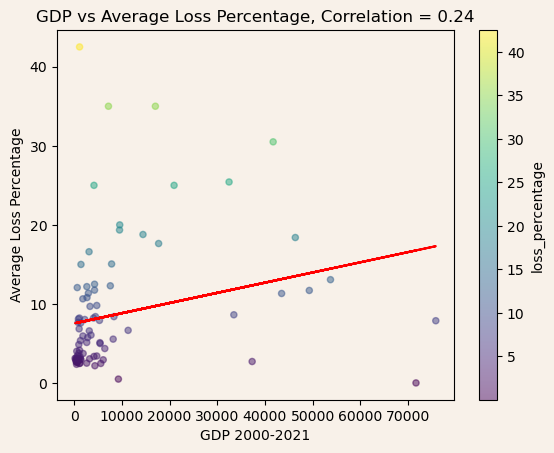

In [17]:


food_loss_by_country = food_loss.groupby('country')
food_loss_by_country = food_loss_by_country["loss_percentage"].mean()
food_loss_by_country = pd.merge(food_loss_by_country,GDP_Per_Country_list, how='left', on='country')
food_loss_by_country = food_loss_by_country.dropna(how = 'any')

x_values = food_loss_by_country['Mean GDP'] 
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values,food_loss_by_country["loss_percentage"] )
regress_values = x_values * slope + intercept
correlation = st.pearsonr(x_values,food_loss_by_country["loss_percentage"])
food_loss_by_country.plot(kind="scatter", x='Mean GDP' , 
          y='loss_percentage',
          c='loss_percentage',
          cmap='viridis', alpha=0.5,
          xlabel='GDP 2000-2021',          
          ylabel='Average Loss Percentage',
          title=f'GDP vs Average Loss Percentage, Correlation = {round(correlation[0], 2)}',)

plt.plot(x_values,regress_values,"r-")

plt.gca().set_facecolor('#F8F1E9')  
plt.gcf().set_facecolor('#F8F1E9')


print(f"The correlation between both factors is {round(correlation[0],2)}")

plt.savefig('GDP vs Average Loss Percentage.png')


In [18]:
#This is a for loop for all the graphs related to the previous section

# List of all the unique Food Supply Stages
food_loss_unique = food_loss_mean['food_supply_stage'].unique()

Temp = []
# for loop to create a list called temp and export each scatter plot on a graph
for i in food_loss_unique:
    try:
        # Adds every row that shares the same food_supply_stage name
        for index, row in food_loss_mean.iterrows():
            if row['food_supply_stage'] == i:
                Temp.append(row)
        
        # once finished appending, it turns temp into a dataframe and cleans it up    
        Temp = pd.DataFrame(Temp)
        Temp = pd.merge(Temp, GDP_Per_Country_list, how='left', on='country')
        Temp = Temp.dropna(how='any')

        # Calculate correlation
        x_values = Temp['Mean GDP'] 
        correlation = st.pearsonr(x_values, Temp["loss_percentage"])

        # Linear regression
        (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, Temp["loss_percentage"])
        regress_values = x_values * slope + intercept

        # Plotting
        Temp.plot(kind="scatter", x='Mean GDP', 
                  y='loss_percentage',
                  c='loss_percentage',
                  cmap='viridis', alpha=0.5)
        plt.xlabel('GDP 2000-2021')
        plt.ylabel(f'{i} Loss Percentage')
        plt.title(f'GDP vs {i} Loss Percentage, Correlation = {round(correlation[0], 2)}')

        plt.plot(x_values, regress_values, "r-")
        plt.gca().set_facecolor('#F8F1E9')  
        plt.gcf().set_facecolor('#F8F1E9')

        print(f"The correlation between GDP and household loss percentage for {i} is {round(correlation[0], 2)}")

        plt.savefig(f'Percentage Folder/GDP vs {i} Loss Percentage.png')
        Temp = []  # Clear the Temp list for the next iteration
        plt.clf()  # Clear the current figure for the next plot
        
    except Exception as e:
        print(f'{i} broke: {e}')
        Temp = []  # Clear the Temp list in case of an error
        plt.clf()  # Clear the current figure in case of an error

The correlation between GDP and household loss percentage for Whole supply chain is -0.12
The correlation between GDP and household loss percentage for Farm is 0.13
The correlation between GDP and household loss percentage for Harvest is 0.21
The correlation between GDP and household loss percentage for Storage is 0.15
The correlation between GDP and household loss percentage for Transportation is 0.24
The correlation between GDP and household loss percentage for Households is 0.58
The correlation between GDP and household loss percentage for Processing is -0.02
The correlation between GDP and household loss percentage for Wholesale is -0.21
The correlation between GDP and household loss percentage for Market is 0.88
The correlation between GDP and household loss percentage for Retail is -0.28
The correlation between GDP and household loss percentage for Food Services is 0.62
The correlation between GDP and household loss percentage for Post-harvest is 0.01
The correlation between GDP 

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>